<a href="https://colab.research.google.com/github/Haeun-Oh/Deep-Learning/blob/main/7.%20AutoEncoder/7_2_Stacked_Auto_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall tensorflow

Uninstalling tensorflow-2.4.1:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.4.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.4.1


In [ ]:
!pip install tensorflow==1.13.1

     |████████████████████████████████| 92.6MB 143kB/s 
     |████████████████████████████████| 51kB 3.8MB/s 
     |████████████████████████████████| 3.2MB 51.7MB/s 
     |████████████████████████████████| 368kB 78.3MB/s 
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0


In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'1.13.1'

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Epoch: 1 cost =  0.049511974
Epoch: 2 cost =  0.028631895
Epoch: 3 cost =  0.024421176
Epoch: 4 cost =  0.022399731
Epoch: 5 cost =  0.020906174
Epoch: 6 cost =  0.019680171
Epoch: 7 cost =  0.018875635
Epoch: 8 cost =  0.018254169
Epoch: 9 cost =  0.017801062
Epoch: 10 cost =  0.017435236
Epoch: 11 cost =  0.016815540
Epoch: 12 cost =  0.016333054
Epoch: 13 cost =  0.016024715
Epoch: 14 cost =  0.015644771
Epoch: 15 cost =  0.015366069
Epoch: 16 cost =  0.015281228
Epoch: 17 cost =  0.015073382
Epoch: 18 cost =  0.014966154
Epoch: 19 cost =  0.014824169
Epoch: 20 cost =  0.014712509


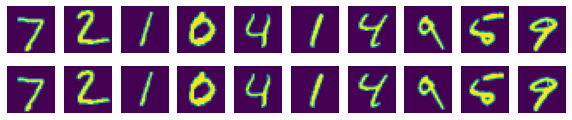

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

batch_size = 100
learning_rate = 0.01
epoch_num = 20
n_input = 28*28
n_hidden1 = 256
n_hidden2 = 128

X = tf.placeholder(tf.float32, [None, n_input])

W_encode1 = tf.Variable(tf.random_uniform([n_input, n_hidden1], -1., 1.))
b_encode1 = tf.Variable(tf.random_uniform([n_hidden1], -1., 1.))

encoder_h1 = tf.nn.sigmoid(tf.add(tf.matmul(X, W_encode1), b_encode1))

W_encode2 = tf.Variable(tf.random_uniform([n_hidden1, n_hidden2], -1., 1.))
b_encode2 = tf.Variable(tf.random_uniform([n_hidden2], -1., 1.))

encoder_h2 = tf.nn.sigmoid(tf.add(tf.matmul(encoder_h1, W_encode2), b_encode2))

W_decode1 = tf.Variable(tf.random_uniform([n_hidden2, n_hidden1], -1., 1.))
b_decode1 = tf.Variable(tf.random_uniform([n_hidden1], -1., 1.))

decoder = tf.sigmoid(tf.add(tf.matmul(encoder_h2, W_decode1), b_decode1))

W_decode2 = tf.Variable(tf.random_uniform([n_hidden1, n_input], -1., 1.))
b_decode2 = tf.Variable(tf.random_uniform([n_input], -1., 1.))

output = tf.nn.sigmoid(tf.add(tf.matmul(decoder, W_decode2), b_decode2))

cost = tf.reduce_mean(tf.square(X-output))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    total_batch = int(mnist.train.num_examples/batch_size)

    for epoch in range(epoch_num):
        avg_cost = 0    
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([optimizer, cost], feed_dict={X:batch_xs})
            avg_cost += cost_val/total_batch
        print('Epoch:', '%d' % (epoch+1), 'cost = ', '{:.9f}'.format(avg_cost))
    
    samples = sess.run(decoder, feed_dict={X: mnist.test.images[:10]})
    fig, ax = plt.subplots(2, 10, figsize=(10, 2))

    for i in range(10):
        ax[0][i].set_axis_off()
        ax[1][i].set_axis_off()
        ax[0][i].imshow(np.reshape(mnist.test.images[i], (28,28)))
        ax[1][i].imshow(np.reshape(mnist.test.images[i], (28,28)))
    plt.show()